# **Machine Learning ex-2(Python)**

# 1 Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline  

In [2]:
#Loading data..
data = pd.read_csv('ex2data1.txt', names=['exam1_scores', 'exam2_scores', 'outcome'])

In [3]:
data.head()
#The first two columns contains the exam scores and the third column contains the label.

,exam1_scores,exam2_scores,outcome
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X = np.asarray(data[["exam1_scores", "exam2_scores"]])
y = np.asarray(data["outcome"])

In [5]:
m,n = X.shape
#Divide the sample into two: ones with positive classification, one with null classification
pos = X[y==1]
neg = X[y==0]

## 1.1 Visualizing the data

Plotting data with + indicating (y = 1) examples and o indicating (y =0) examples.


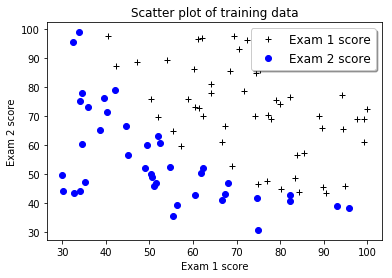

In [6]:
#==================== Part 1: Plotting Data====================
# We start the exercise by first plotting the data to understand the problem we are working with.

print("Plotting data with + indicating (y = 1) examples and o indicating (y =0) examples.")
def plotData(X,y):
    #find indices of positive and negative examples
    pos = y==1
    neg = y==0
    plt.plot(X[pos,0], X[pos,1],'k+',ms =6,label = 'Exam 1 score')
    plt.plot(X[neg,0], X[neg,1],'bo',label = 'Exam 2 score')
    plt.title("Scatter plot of training data")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(loc = 1,shadow = True,fontsize=12 )
    
plotData(X,y)

# 1.2 Implementation

# 1.2.1 Warmup exercise: sigmoid function

In [7]:
def sigmoid(z):
    g_z = 1/(1+ np.exp(-z))
    return g_z

Text(0.5, 1.0, 'Sigmoid function')

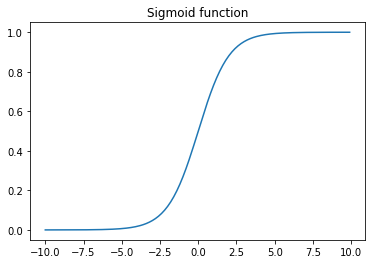

In [8]:
#Some extra stuff
from scipy.special import expit
x_axis = np.arange(-10,10,0.1)
plt.plot(x_axis,expit(x_axis))
plt.title("Sigmoid function")

# 1.2.2 Cost function and gradient

In [9]:
m = len(y)
X = np.concatenate([np.ones((m, 1)), X], axis=1)
def costFunction(theta, X, y):
    grad = np.zeros(theta.shape)
    training_examples = X.shape[0]
    h_theta_x = sigmoid(np.dot(X,theta))
    for i in range(training_examples):
        part1 = -y*np.log(h_theta_x)
        part2 = -(1-y)*np.log(1-h_theta_x)
        J = np.sum(part1 + part2)/training_examples
        grad = np.matmul(h_theta_x - y, X)/m
        return J,grad
#Check that with theta as zeros, cost returns about 0.693 and expected gradients are -0.1000,  -12.0092, -11.2628 approx.
initial_theta = np.zeros(n+1)
costFunction(initial_theta,X,y)

(0.6931471805599453, array([ -0.1       , -12.00921659, -11.26284221]))

In [10]:
#Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y);
print('\nCost at test theta:', cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta:');
print( grad)
print('\nExpected gradients (approx):\n 0.043\n 2.566\n 2.647\n');


Cost at test theta: 0.21833019382659796
Expected cost (approx): 0.218

Gradient at test theta:
[0.04290299 2.56623412 2.64679737]

Expected gradients (approx):
 0.043
 2.566
 2.647



# 1.2.3 Learning Parameters using scipy.optimize

In [11]:
#the function scipy.optimize.minimize is the method to use for 
#optimization problems(both constrained and unconstrained).
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
from scipy import optimize
options = {'maxiter':400}
res = optimize.minimize(costFunction,initial_theta,(X,y),jac = True,method = 'TNC',options = options)
#the fun property of 'OptimizeResult' object returns the value of costFunction at optimized theta
cost = res.fun
#the optimized theta is in the x property
theta = res.x
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');
print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


## Decision Boundary

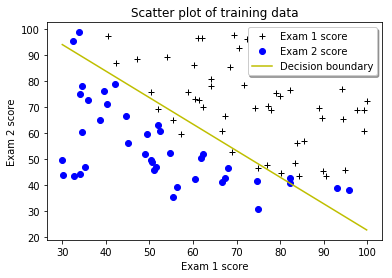

In [12]:
#h_theta_x = 0 gives the decision boundary
x1 = np.array([X[:,1].min(), X[:,1].max()])
x2 = -(theta[1] * x1 + theta[0]) / theta[2]
plotData(X[:,1:3], y)
plt.plot(x1, x2, 'y-', label='Decision boundary')
plt.legend(loc = 1,shadow = True,fontsize=10)
plt.show()

# 1.2.4 Evaluating logistic regression

In [13]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
p = sigmoid(np.dot(theta,np.array([1,45,85])))
print(p)

0.7762906217710582


In [14]:
def predict(theta, X):
    p = sigmoid(np.matmul(X, theta))
    predictions = np.zeros(p.shape)
    predictions[np.where(p >= .5)] = 1
    return predictions

In [15]:
# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


# 2 Regularized logistic regression

In [16]:
data2 = pd.read_csv('ex2data2.txt', names=['Microchip Test 1', 'Microchip Test 2', 'outcome'])
X2 = np.asarray(data2[["Microchip Test 1","Microchip Test 2"]])
y2 = np.asarray(data2["outcome"])

In [17]:
print(X2.shape,y2.shape)

(118, 2) (118,)


## 2.1 Visualizing the data

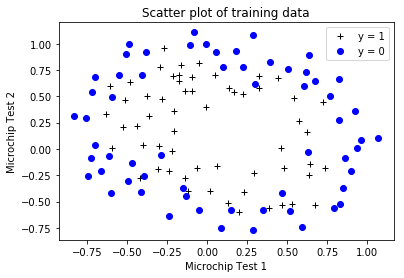

In [18]:
def plotData1(X2,y2):
    plotData(X2, y2)
    # Labels and Legend
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    # Specified in plot order
    plt.legend(['y = 1', 'y = 0'], loc='upper right')
plotData1(X2,y2)

# 2.2 Feature mapping

In [19]:
#    Maps the two input features to quadratic features used in the regularization
def mapFeature(X1,X2,degree=6):
    if(X1.ndim > 0):
        out = [np.ones(len(X1))]
    else:
        out = [np.ones(1)]
    for i in range(1,degree+1):
        for j in range(i + 1):
            out.append((X1 ** (i-j)) * (X2 ** j))
    if X1.ndim > 0:
        return np.stack(out,axis=1)
    else:
        return np.array(out)
X = mapFeature(X2[:,0],X2[:,1])

In [20]:
#As a result of this mapping, our vector of two features (the scores on
#two QA tests) has been transformed into a 28-dimensional vector.
X.shape

(118, 28)

# 2.3 Cost function and gradient

In [21]:
#While the feature mapping allows us to build a more expressive classifier,
#it also more susceptible to overfitting.
#Let's see how regularization can help combat the overfitting problem.
def costFunctionReg(theta,X,y,lambda_):
    m = y.size
    grad = np.zeros(theta.shape)
    h_x = sigmoid(np.matmul(X,theta))
    J = 1/m*((np.sum(-y*np.log(h_x)-(1-y)*np.log(1-h_x)))) + (lambda_*np.sum(theta**2))/(2*m)
    grad = 1/m * np.matmul(h_x-y,X)
    grad_reg = grad +  (lambda_/m)*theta
    grad_reg[0] = grad[0]
    return J,grad_reg

In [22]:
#Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
# Compute and display initial cost and gradient for regularized logistic
# regression
cost,grad = costFunctionReg(initial_theta,X,y2,lambda_)
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost2, grad2 = costFunctionReg(test_theta, X, y2, 10)
print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost2))
print('Expected cost (approx): 3.2\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad2[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')



Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.21
Expected cost (approx): 3.2

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


## 2.3.1 Learning parameters using scipy.optimize

In [23]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
def optimizeRegularisedTheta(initial_theta,X,y2,lambda_):
    options = {'maxiter':100}
    res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X,y2,lambda_),
                        jac = True,
                        method = 'TNC',
                        options = options)
    #the fun property of 'OptimizeResult' object returns
    #the value of costFunction at optimized theta
    cost = res.fun
    #the optimized theta is in the x property
    theta = res.x
    return cost,theta
cost,theta = optimizeRegularisedTheta(initial_theta,X,y2,lambda_)
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Cost at theta found by optimize.minimize: 0.536
theta:
	[1.254, 0.623, 1.192]


# 2.4 Plotting the decision boundary

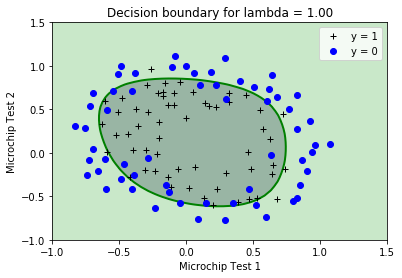

In [24]:
def plotDecisionBoundary(plotData, theta, X, y,lambda_):
    theta = np.array(theta)
    mincost,theta = optimizeRegularisedTheta(initial_theta,X,y2,lambda_)
    plotData(X[:, 1:3], y)

    # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((u.size, v.size))
    #Evaluate z = theta*x over the grid
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            z[i, j] = np.dot(mapFeature(ui, vj), theta)

    z = z.T  # important to transpose z before calling contour
    # Plot z = 0
    plt.title('Decision boundary for lambda = %0.2f'%lambda_)
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
    plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
lambda_ = 1
plotDecisionBoundary(plotData1,theta,X,y2,lambda_)

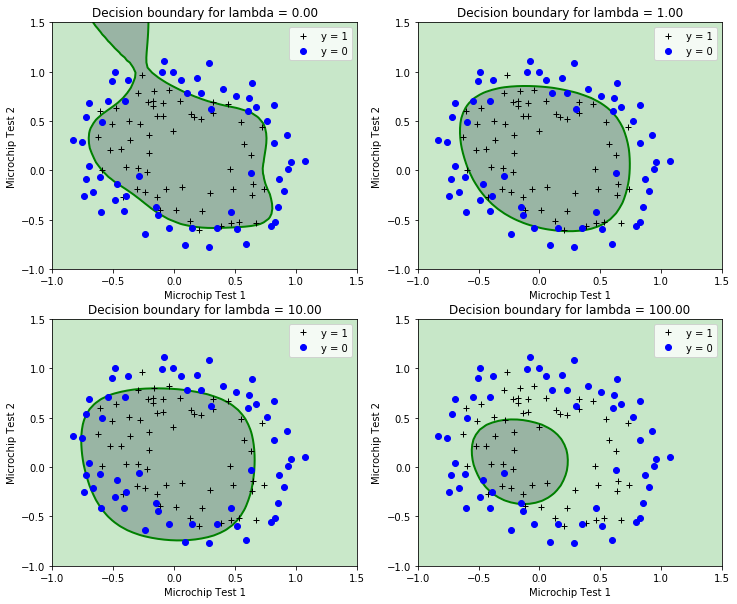

In [25]:
# we will get to try out different regularization parameters 
#for the dataset to understand how regularization prevents overfitting.
plt.figure(figsize = (12,10))
plt.subplot(221)
#No regularization (overfitting)
plotDecisionBoundary(plotData1,theta,X,y2,0)

#Decision boundary with regularization 
plt.subplot(222)
plotDecisionBoundary(plotData1,theta,X,y2,1)


plt.subplot(223)
plotDecisionBoundary(plotData1,theta,X,y2,10)

#Decision boundary with too much regularization 
plt.subplot(224)
plotDecisionBoundary(plotData1,theta,X,y2,100)
plt.show()

In [26]:
# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: %.1f %%' % (np.mean(p == y2) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)

